In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as scisig

In [2]:
trace = pd.read_csv("/Users/elias/Desktop/School/physics-111B/NMR/NMR-data/lock-in-data/Mn 1.csv", sep='\t', header=None)
display(trace)

,0,1
0,0.00,0.903164
1,0.05,0.909932
2,0.10,0.909610
3,0.15,0.908965
4,0.20,0.910577
...,...,...
11785,589.25,0.910899
11786,589.30,0.895590
11787,589.35,0.893978
11788,589.40,0.895106


array([0.0000e+00, 5.0000e-02, 1.0000e-01, ..., 5.8935e+02, 5.8940e+02,
       5.8945e+02])

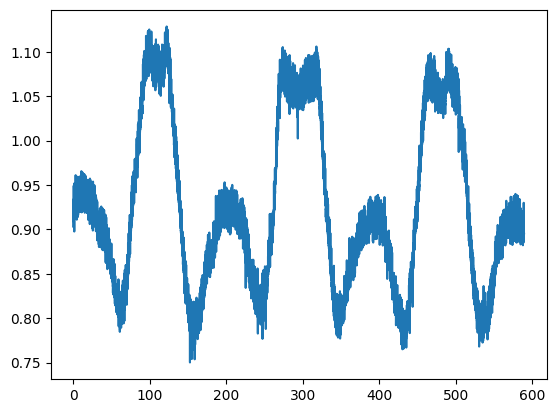

In [3]:
plt.plot(trace[0],trace[1])
display(trace[0].to_numpy())

(0.75, 1.15)

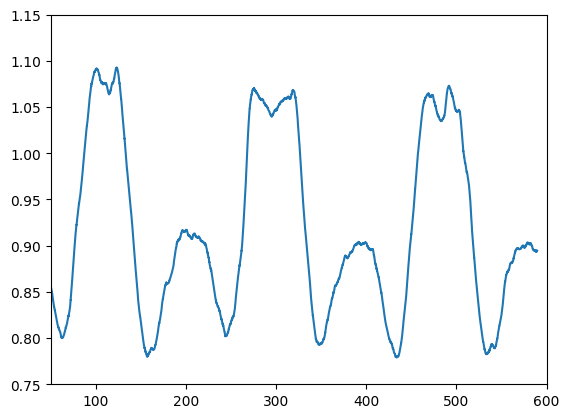

In [4]:
plt.plot(trace[0].to_numpy(),scisig.lfilter([1.0 / 50] * 50,1,trace[1]))
plt.xlim(50, 600)
plt.ylim(0.75,1.15)

(50.0, 600.0)

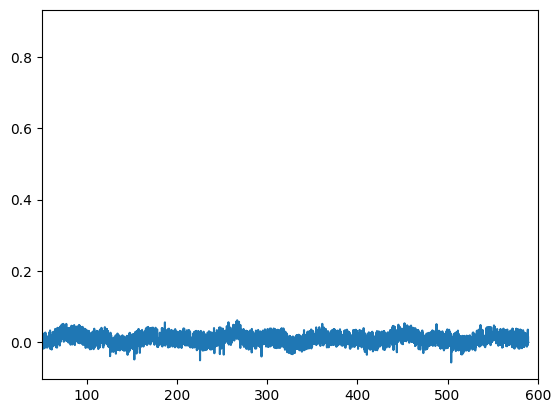

In [5]:
plt.plot(trace[0].to_numpy(),trace[1]-scisig.lfilter([1.0 / 50] * 50,1,trace[1]))
plt.xlim(50, 600)
#plt.ylim(0.75,1.15)

In [6]:
sn = (np.sum(scisig.lfilter([1.0 / 50] * 50,1,trace[1])**2)/len(trace[1])) / (np.sum(trace[1]-scisig.lfilter([1.0 / 50] * 50,1,trace[1]))**2/len(trace[1]))

In [7]:
display(sn)

20.826209579981043

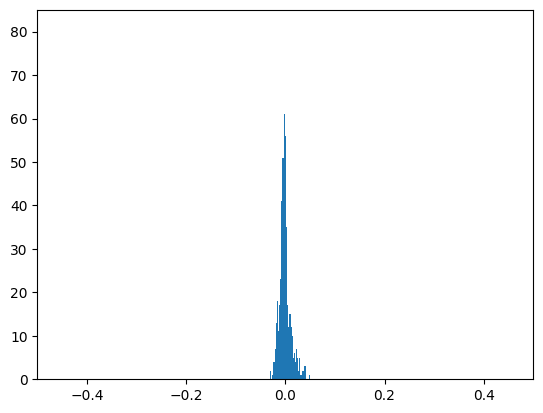

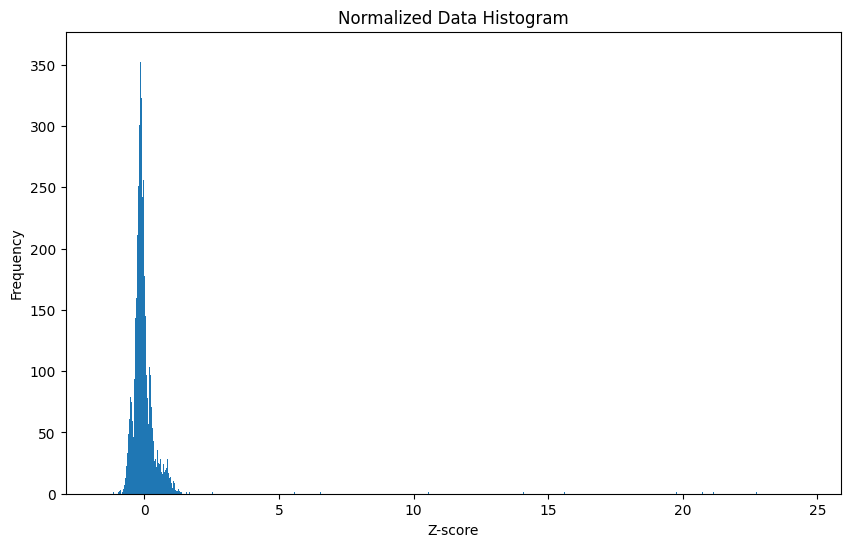

Shapiro-Wilk Test on Normalized Data: Statistic=0.2307642102241516, p-value=0.0
Anderson-Darling Test on Normalized Data: Statistic=1995.4850342994341, Critical Values=[0.576 0.656 0.787 0.918 1.092], Significance Levels=[15.  10.   5.   2.5  1. ]


In [9]:
plt.hist(trace[1]-scisig.lfilter([1.0 / 50] * 50,1,trace[1]), 10000)
plt.xlim(-0.5, 0.5)

from scipy.stats import zscore
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson

# Assuming 'data' is the variable containing your data
data = trace[1] - scisig.lfilter([1.0 / 50] * 50, 1, trace[1])
# Z-score normalization
normalized_data = zscore(data)

# # Plot the normalized data
# plt.figure(figsize=(10, 6))
# plt.hist(normalized_data, bins=2000)
# plt.title('Normalized Data Histogram')
# plt.xlabel('Z-score')
# plt.ylabel('Frequency')
# plt.show()

# Perform normality tests on the normalized data
stat, p_value = shapiro(normalized_data)
print(f'Shapiro-Wilk Test on Normalized Data: Statistic={stat}, p-value={p_value}')

result = anderson(normalized_data)
print(f'Anderson-Darling Test on Normalized Data: Statistic={result.statistic}, Critical Values={result.critical_values}, Significance Levels={result.significance_level}')